In [1]:
import numpy as np
from bec.quantum_dot.dot import QuantumDot
from smef.core.drives.types import DriveSpec
from smef.engine import SimulationEngine, UnitSystem
from smef.core.units import Q

from bec.metrics.metrics import QDDiagnostics
from bec.quantum_dot.dot import QuantumDot
from bec.quantum_dot.enums import QDState, TransitionPair
from bec.quantum_dot.factories.drives import make_gaussian_field_drive_pi
from bec.quantum_dot.smef.initial_state import rho0_qd_vacuum
from bec.quantum_dot.spec.energy_structure import EnergyStructure
from bec.quantum_dot.spec.dipole_params import DipoleParams
from bec.quantum_dot.spec.cavity_params import CavityParams
from bec.quantum_dot.enums import Transition

from bec.light.classical.field_drive import ClassicalFieldDriveU
from bec.light.classical.amplitude import FieldAmplitude
from bec.light.classical.carrier import Carrier
from bec.light.envelopes.gaussian import GaussianEnvelopeU
from bec.light.core.polarization import JonesState
from bec.light.classical.carrier_profiles import constant as constant_detune

from bec.reporting.plotting.api import plot_run, plot_runs
from bec.reporting.plotting.grid import PlotConfig
from bec.metrics.metrics import QDDiagnostics
from smef.core.units import Q

from bec.quantum_dot.dot import QuantumDot
from bec.quantum_dot.spec.energy_structure import EnergyStructure
from bec.quantum_dot.spec.dipole_params import DipoleParams
from bec.quantum_dot.spec.cavity_params import CavityParams
from bec.quantum_dot.spec.phonon_params import (
    PhononParams,
    PhononModelKind,
    PolaronLAParams,
    PhononCouplings,
    PhenomenologicalPhononParams,
SpectralDensityKind
)

In [2]:
import numpy as np
from bec.scenarios import (
    SchemeKind, SweepAxis, SweepSpec, ScenarioRunConfig,
    run_sweep_1d, robustness_summary_1d,
)
def make_qd() -> QuantumDot:
    exciton = Q(1.300, "eV")
    binding = Q(3.0e-3, "eV")
    fss = Q(5.0e-6, "eV")

    energy = EnergyStructure.from_params(
        exciton=exciton,
        binding=binding,
        fss=fss,
    )

    dipoles = DipoleParams.biexciton_cascade_from_fss(
        mu_default_Cm=Q(10.0 * 3.33564e-30, "C*m"),
        fss=fss,
    )

    cavity = CavityParams.from_values(
        Q=5.0e4,
        Veff_um3=0.5,
        lambda_nm=930.0,
        n=3.4,
    )

    return QuantumDot(
        energy=energy,
        dipoles=dipoles,
        cavity=cavity,
        phonons=None,
    )

qd = make_qd()  # no phonons baseline
cfg = ScenarioRunConfig(t_end_ns=2.0, n_points=2001, t0_ns=1.0, sigma_ns=0.05, audit=False)

# Sweep amplitude
amp_sweep = SweepSpec(
    axis=SweepAxis.AMP_SCALE,
    values=np.linspace(0.7, 1.3, 21),
    threshold_xx=0.9,
)

base_kwargs = dict(
    amp_scale=1.0,
    detuning_offset_rad_s=0.0,
    label="tpe_sweep",
)

res_tpe_amp = run_sweep_1d(qd, scheme=SchemeKind.TPE, cfg=cfg, sweep=amp_sweep, base_kwargs=base_kwargs)
summ = robustness_summary_1d(res_tpe_amp, threshold=amp_sweep.threshold_xx)
print(summ["pass_fraction"].value, summ["auc_above_threshold"].value)


chosen_final: [('G<->XX', '2ph', 1.0, 0.0, 0.0)]


  0%|          | 0/2000 [00:00<?, ?it/s]

chosen_final: [('G<->XX', '2ph', 1.0, 0.0, 0.0)]


  0%|          | 0/2000 [00:00<?, ?it/s]

chosen_final: [('G<->XX', '2ph', 1.0, 0.0, 0.0)]


  0%|          | 0/2000 [00:00<?, ?it/s]

chosen_final: [('G<->XX', '2ph', 1.0, 0.0, 0.0)]


  0%|          | 0/2000 [00:00<?, ?it/s]

chosen_final: [('G<->XX', '2ph', 1.0, 0.0, 0.0)]


  0%|          | 0/2000 [00:00<?, ?it/s]

chosen_final: [('G<->XX', '2ph', 1.0, 0.0, 0.0)]


  0%|          | 0/2000 [00:00<?, ?it/s]

chosen_final: [('G<->XX', '2ph', 1.0, 0.0, 0.0)]


  0%|          | 0/2000 [00:00<?, ?it/s]

chosen_final: [('G<->XX', '2ph', 1.0, 0.0, 0.0)]


  0%|          | 0/2000 [00:00<?, ?it/s]

chosen_final: [('G<->XX', '2ph', 1.0, 0.0, 0.0)]


  0%|          | 0/2000 [00:00<?, ?it/s]

chosen_final: [('G<->XX', '2ph', 1.0, 0.0, 0.0)]


  0%|          | 0/2000 [00:00<?, ?it/s]

chosen_final: [('G<->XX', '2ph', 1.0, 0.0, 0.0)]


  0%|          | 0/2000 [00:00<?, ?it/s]

chosen_final: [('G<->XX', '2ph', 1.0, 0.0, 0.0)]


  0%|          | 0/2000 [00:00<?, ?it/s]

chosen_final: [('G<->XX', '2ph', 1.0, 0.0, 0.0)]


  0%|          | 0/2000 [00:00<?, ?it/s]

chosen_final: [('G<->XX', '2ph', 1.0, 0.0, 0.0)]


  0%|          | 0/2000 [00:00<?, ?it/s]

chosen_final: [('G<->XX', '2ph', 1.0, 0.0, 0.0)]


  0%|          | 0/2000 [00:00<?, ?it/s]

chosen_final: [('G<->XX', '2ph', 1.0, 0.0, 0.0)]


  0%|          | 0/2000 [00:00<?, ?it/s]

chosen_final: [('G<->XX', '2ph', 1.0, 0.0, 0.0)]


  0%|          | 0/2000 [00:00<?, ?it/s]

chosen_final: [('G<->XX', '2ph', 1.0, 0.0, 0.0)]


  0%|          | 0/2000 [00:00<?, ?it/s]

chosen_final: [('G<->XX', '2ph', 1.0, 0.0, 0.0)]


  0%|          | 0/2000 [00:00<?, ?it/s]

chosen_final: [('G<->XX', '2ph', 1.0, 0.0, 0.0)]


  0%|          | 0/2000 [00:00<?, ?it/s]

chosen_final: [('G<->XX', '2ph', 1.0, 0.0, 0.0)]


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0 0.0


chosen_final: [('G<->XX', '2ph', 1.0, 0.0, 0.0)]


  0%|          | 0/2000 [00:00<?, ?it/s]

xx_final extracted: 0.47740421191566657
metrics type: <class 'bec.metrics.metrics.QDMetrics'>
metrics dir has: ['qd_pop']
QUANTUM DOT METRICS REPORT

STATE SANITY
------------------------------------------------------------------------------
Trace               : 1
Hermiticity error   : 7.85161e-17
Min eigenvalue      : -7.45112e-17

QD POPULATIONS (final state)
------------------------------------------------------------------------------
  G : 0.994564
 X1 : 0.00265572
 X2 : 0.00265572
 XX : 0.000124219

PHOTON NUMBER DECOMPOSITION (GX + XX)
------------------------------------------------------------------------------
p0        : 0.0638319
p1_total  : 0.00443971
p2_exact  : 0.911155

PHOTON NUMBER DECOMPOSITION (GX only)
------------------------------------------------------------------------------
p0        : 0.0682716
p1_total  : 0.912027
p2_exact  : 0.0197013

PHOTON NUMBER DECOMPOSITION (XX only)
------------------------------------------------------------------------------
p0  

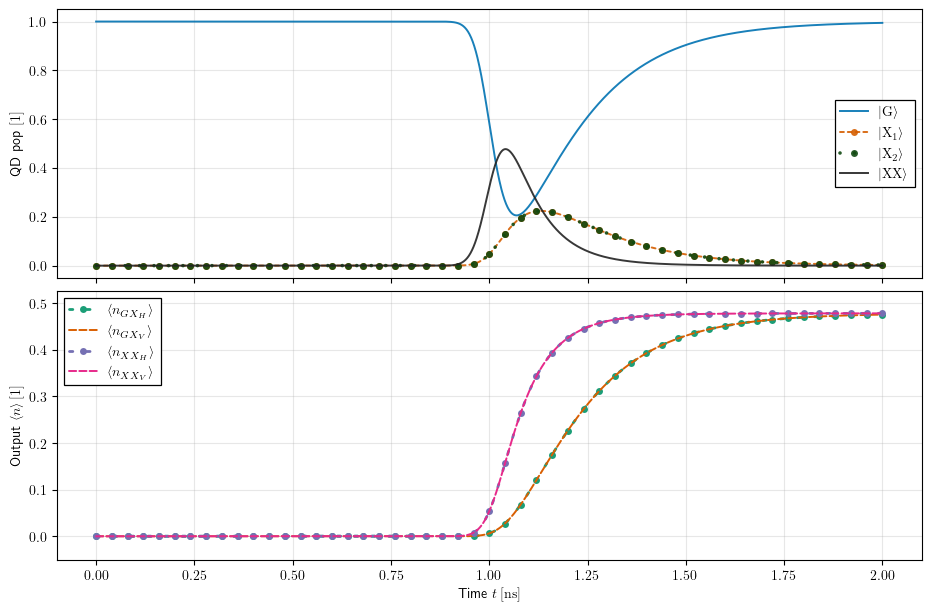

In [5]:
qd = make_qd()
cfg = ScenarioRunConfig()

from bec.scenarios.factories import make_tpe_drive_specs
from bec.scenarios.run import run_scenario_once

specs, payloads = make_tpe_drive_specs(qd, cfg=cfg, amp_scale=1.0, detuning_offset_rad_s=0.0, label="tpe_dbg")

res, metrics, tlist, units, xx_final = run_scenario_once(
    qd,
    scheme=SchemeKind.TPE,
    x_params={"dbg": 1.0},
    specs=specs,
    drives_for_plot=payloads,
    cfg=cfg,
)

print("xx_final extracted:", xx_final)
print("metrics type:", type(metrics))
print("metrics dir has:", [name for name in dir(metrics) if "pop" in name.lower()])
print(metrics.to_text())
plot_run(res, units=units, drives=specs, qd=qd);